##**Código para las gráficas de elaboración propia**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel("BBDD IPETE.xlsx")

**Gráfico 1**

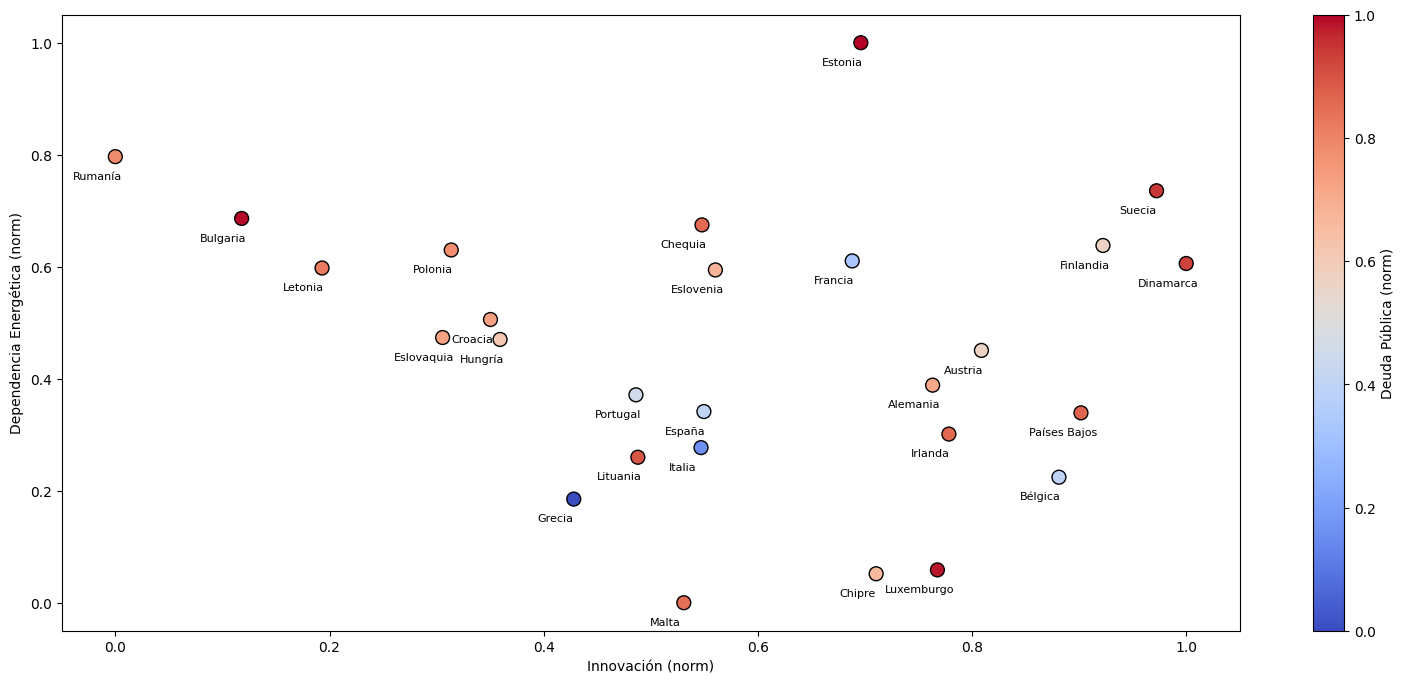

In [ ]:
plt.figure(figsize=(19, 8))

# Gráfico 1: Dispersión de EIS vs Dependencia, con Deuda como color
plt.subplot(1, 1, 1)
scatter = plt.scatter(
    df["EIS Norm."],
    df["Dependencia energética Norm,"],
    c=df["Deuda Norm."],
    cmap='coolwarm',
    edgecolor='k',
    s=100
)

for i in range(len(df)):
    plt.text(
        df["EIS Norm."][i] - 0.017,  # para la etiqueta de los puntos a la izquierda
        df["Dependencia energética Norm,"][i]- 0.04,
        df["País"][i],
        fontsize=8,
        ha='center'
    )


plt.xlabel("Innovación (norm)")
plt.ylabel("Dependencia Energética (norm)")
plt.colorbar(scatter, label="Deuda Pública (norm)")


**Gráfico 2**

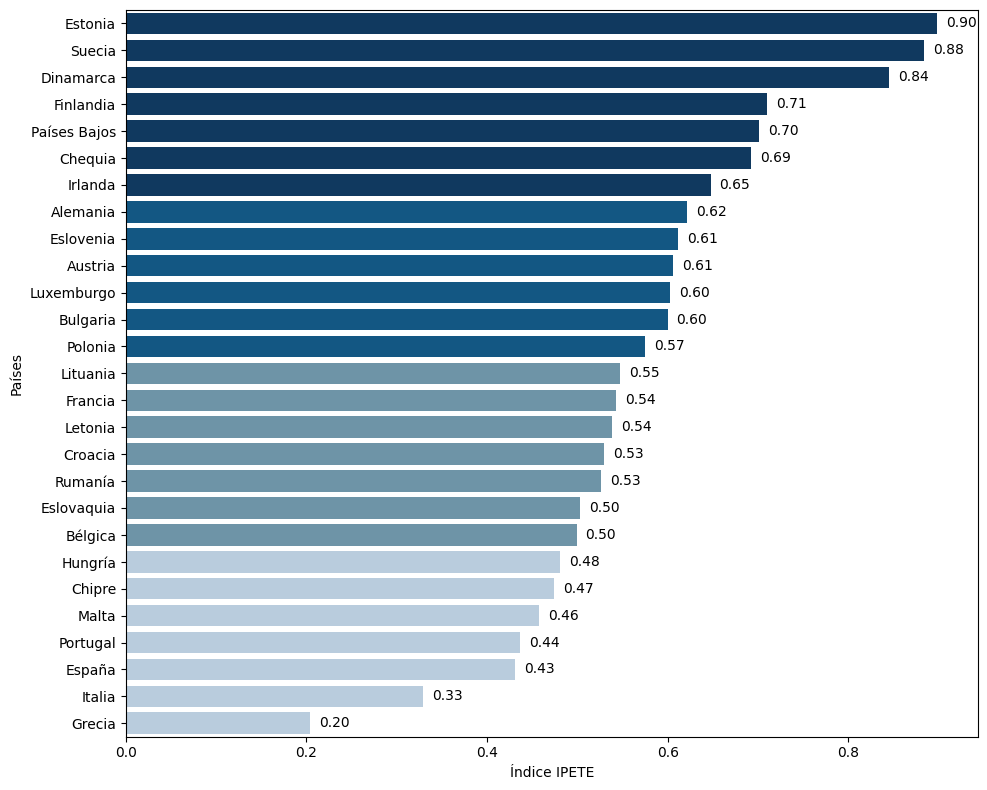

In [ ]:
# Ordenar por el índice estructural
df_sorted = df[["País", "Índice (IPETE)"]].sort_values(by="Índice (IPETE)", ascending=False).reset_index(drop=True)

# Calcular los percentiles 25, 50 y 75 del índice
q1_val = df_sorted["Índice (IPETE)"].quantile(0.25)
q2_val = df_sorted["Índice (IPETE)"].quantile(0.50)
q3_val = df_sorted["Índice (IPETE)"].quantile(0.75)

# Asignar cuartil por valor
def asignar_cuartil(valor):
    if valor <= q1_val:
        return "Q1"
    elif valor <= q2_val:
        return "Q2"
    elif valor <= q3_val:
        return "Q3"
    else:
        return "Q4"

df_sorted["Cuartil_por_valor"] = df_sorted["Índice (IPETE)"].apply(asignar_cuartil)

# Mapa de colores en tonos de azul
palette_dict_valores = {
    "Q1": "#b3cde3",   # azul claro
    "Q2": "#6497b1",   # azul medio claro
    "Q3": "#005b96",   # azul medio oscuro
    "Q4": "#03396c"    # azul oscuro
}

# Crear el gráfico
plt.figure(figsize=(10, 8))
barplot = sns.barplot(
    data=df_sorted,
    x="Índice (IPETE)",
    y="País",
    hue="Cuartil_por_valor",
    palette=palette_dict_valores,
    dodge=False
)

# Quitar la leyenda automática
barplot.legend_.remove()

# Añadir etiquetas al final de cada barra
for index, value in enumerate(df_sorted["Índice (IPETE)"]):
    plt.text(value + 0.01, index, f"{value:.2f}", va='center')

plt.xlabel("Índice IPETE")
plt.ylabel("Países")
plt.tight_layout()
plt.show()
